In [1]:
#import neccesary library
import numpy as np
import pandas as pd


In [2]:
#load the data 
df=pd.read_csv('/kaggle/input/stock-market-prediction/infolimpioavanzadoTarget.csv')
df.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [4]:
df.head(5)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [5]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [6]:
new_df=df[['date','open', 'high', 'low', 'close','volume']]
new_df.head()


,date,open,high,low,close,volume
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,106600
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,128700
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,103100
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,173600
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,137800


In [7]:
new_df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [8]:
new_df.duplicated().sum()

0

In [9]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from  sklearn import  metrics 
from sklearn.model_selection import train_test_split


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.,  9000.]),
 [Text(-1000.0, 0, '2022-01-07'),
  Text(0.0, 0, '2022-01-03'),
  Text(1000.0, 0, '2022-12-27'),
  Text(2000.0, 0, '2022-12-20'),
  Text(3000.0, 0, '2022-12-14'),
  Text(4000.0, 0, '2022-12-08'),
  Text(5000.0, 0, '2022-12-02'),
  Text(6000.0, 0, '2022-11-28'),
  Text(7000.0, 0, '2022-11-21'),
  Text(8000.0, 0, ''),
  Text(9000.0, 0, '')])

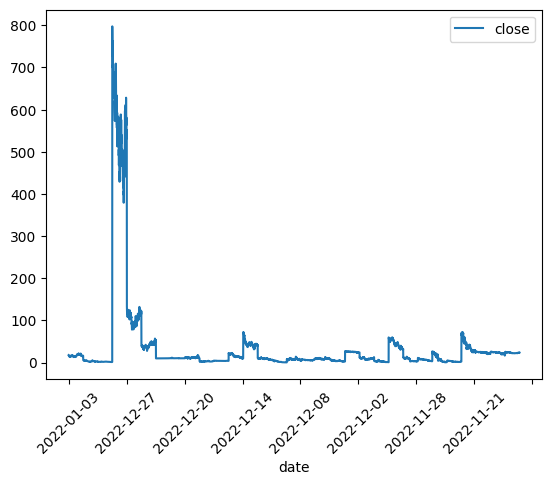

In [10]:
new_df.plot(x='date',y='close')
plt.xticks(rotation=45)

In [11]:
x=new_df[['open','high','low','volume']]
y=new_df['close']
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
linear_regressor=LinearRegression()

In [13]:
linear_regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
#weights for each component and intercept as in y=a1x1+a2x2+a3x3+a4x4+b
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[-7.02417156e-01  8.46474979e-01  8.56798588e-01  1.00940145e-10]
-0.030948465006282788


In [15]:
#storing the predicted values
predicted_values=linear_regressor.predict(x_test)

In [16]:
difference_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted_values})
print(difference_df)

      Actual Price  Predicted Price
7677     22.190001        22.117302
1926     10.100000        10.077702
2280      2.550000         2.478514
2333      2.620000         2.618350
101      14.110000        14.134236
...            ...              ...
3787      5.450000         5.487277
7502     22.417000        22.213087
1183    107.570000       106.163061
5899      3.390000         3.391885
7138     24.040001        23.660624

[1946 rows x 2 columns]


In [17]:
linear_regressor.score(x_test,y_test)

0.9998811498763057

In [18]:
metrics.mean_squared_error(y_test,predicted_values)

0.9620553189130236

In [19]:
graph=difference_df.head(30)

<Axes: >

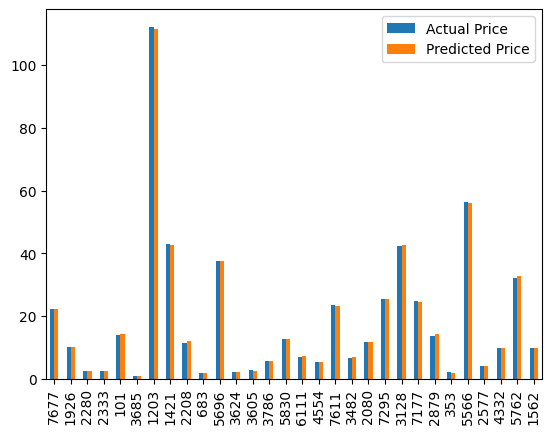

In [20]:
graph.plot(kind="bar")